We would build a baseline model and then prune it by cost complexity pruning technique to improve accuracy 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import cross_val_score,GridSearchCV

I am using the heart disease dataset from UCI Machine learning repository

https://www.kaggle.com/ronitf/heart-disease-uci

In [48]:
data = pd.read_csv("heart.csv")

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


there are 2 classes in target field ->

0 -> No heart disease

1 -> Has heart disease

In [50]:
data.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [51]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [52]:
for col in data.columns.difference(['age','trestbps','chol','thalach','oldpeak']):
    print(data[col].value_counts())
    print('\n')

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64


0    143
2     87
1     50
3     23
Name: cp, dtype: int64


0    204
1     99
Name: exang, dtype: int64


0    258
1     45
Name: fbs, dtype: int64


1    152
0    147
2      4
Name: restecg, dtype: int64


1    207
0     96
Name: sex, dtype: int64


2    142
1    140
0     21
Name: slope, dtype: int64


1    165
0    138
Name: target, dtype: int64


2    166
3    117
1     18
0      2
Name: thal, dtype: int64




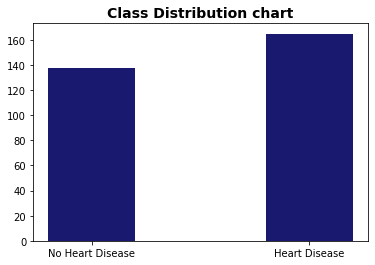

In [53]:
target_x = data['target'].value_counts().index
target_y = data['target'].value_counts().values
fig=plt.figure(figsize=(6,4))
plt.bar(target_x,target_y,width=0.4,color='midnightblue')
plt.xticks(ticks=[0,1],labels=['No Heart Disease','Heart Disease'])
plt.title('Class Distribution chart',fontsize=14,fontweight='bold')
plt.show()

In [54]:
## convert categorical variables into numerical variables

def create_dummies(df,col):
    dummy = pd.get_dummies(df[col],prefix=col)
    dummy.drop(dummy.columns[0],axis=1,inplace=True)
    df = pd.concat([df,dummy],axis=1)
    df.drop(col,axis=1,inplace=True)
    return df

In [55]:
cat_features = list(data.columns.difference(['age','trestbps','chol','thalach','oldpeak','target']))
print(cat_features)

['ca', 'cp', 'exang', 'fbs', 'restecg', 'sex', 'slope', 'thal']


In [56]:
for col in cat_features:
    data = create_dummies(data,col)

In [57]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,ca_1,ca_2,ca_3,ca_4,...,exang_1,fbs_1,restecg_1,restecg_2,sex_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,37,130,250,187,3.5,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.8,1,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0


In [58]:
data.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'ca_1',
       'ca_2', 'ca_3', 'ca_4', 'cp_1', 'cp_2', 'cp_3', 'exang_1', 'fbs_1',
       'restecg_1', 'restecg_2', 'sex_1', 'slope_1', 'slope_2', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [59]:
x = data[data.columns.difference(['target'])]
x.head()

,age,ca_1,ca_2,ca_3,ca_4,chol,cp_1,cp_2,cp_3,exang_1,...,restecg_1,restecg_2,sex_1,slope_1,slope_2,thal_1,thal_2,thal_3,thalach,trestbps
0,63,0,0,0,0,233,0,0,1,0,...,0,0,1,0,0,1,0,0,150,145
1,37,0,0,0,0,250,0,1,0,0,...,1,0,1,0,0,0,1,0,187,130
2,41,0,0,0,0,204,1,0,0,0,...,0,0,0,0,1,0,1,0,172,130
3,56,0,0,0,0,236,1,0,0,0,...,1,0,1,0,1,0,1,0,178,120
4,57,0,0,0,0,354,0,0,0,1,...,1,0,0,0,1,0,1,0,163,120


In [60]:
y= data['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=100)

print("Training dataset length : ",len(x_train))
print("Testing dataset length : ",len(x_test))

Training dataset length :  227
Testing dataset length :  76


### 1. Building Base classifier Tree

In [79]:
tree1 = DecisionTreeClassifier(random_state=100).fit(x_train,y_train)

print("Predicting for Train Dataset")
y_train_pred = tree1.predict(x_train)

print("\n Accuracy Score for train dataset: :",100*np.round(accuracy_score(y_train,y_train_pred),2))

print("\n Predicting for Test Dataset")
y_test_pred = tree1.predict(x_test)

print("\n Accuracy Score for train dataset: :",100*np.round(accuracy_score(y_test,y_test_pred),2))

Predicting for Train Dataset

 Accuracy Score for train dataset: : 100.0

 Predicting for Test Dataset

 Accuracy Score for train dataset: : 76.0


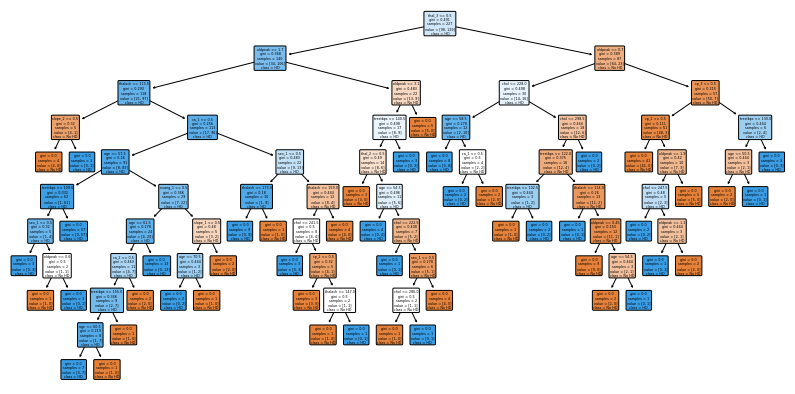

In [80]:
plt.figure(figsize=(14,7))
_ = plot_tree(tree1,filled=True,rounded=True,class_names=['No HD','HD'],feature_names=x.columns)

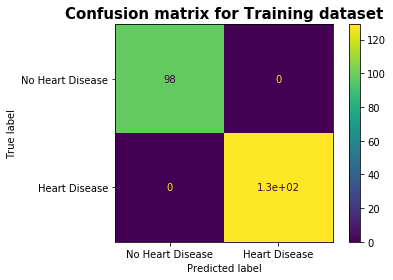

In [81]:
plot_confusion_matrix(tree1,x_train,y_train,display_labels=['No Heart Disease','Heart Disease']);
plt.title('Confusion matrix for Training dataset',fontsize=15,fontweight='bold');

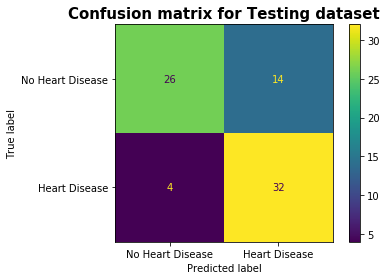

In [82]:
plot_confusion_matrix(tree1,x_test,y_test,display_labels=['No Heart Disease','Heart Disease']);
plt.title('Confusion matrix for Testing dataset',fontsize=15,fontweight='bold');

### 2.Pruning Tree using Cost complexity Pruning

In [90]:
path = tree1.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

print(ccp_alphas)

[0.         0.00288949 0.00352423 0.00367107 0.00403818 0.00524439
 0.00528634 0.00528634 0.00587372 0.00587372 0.00624082 0.00685267
 0.00704846 0.00715211 0.00734214 0.00750305 0.00792952 0.0082232
 0.00824294 0.00881057 0.00883249 0.00954086 0.01543185 0.01585903
 0.01610214 0.01747567 0.01779942 0.02785871 0.02918522 0.114795  ]
